In [ ]:
# default_exp intro_to_control_theory

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from importing_modules import *

In [ ]:
%matplotlib inline

------------------------

# Why Learn Control Theory?

This notebook we provide an overview of the big picture problem that we’re trying to solve as control system engineers. 

- Control theory allows to solve a number of engineering problems, not only as control engineers but as any engineer
    - Switching power regulators
    - Automatic gain control circuits that automatically increase or decrease the gain of a signal
    - Isolation system in a motor mount that is sensitive to vibrations
    - Industrial robotics
    - etc.

Control system is:
- Building models of your system
- Simulate them to make predictions
- Understanding the dynamics and how they interact with the rest of the system
- Filtering and rejecting noise
- Selecting or designing hardware (sensors, actuators)
- Testing the system in expected and unexpected environments
- It is understanding your system!

------------------

## What is a system?

The concept is straigthforward, but the term is sometime applied very generically

For us:

> A **system** is a collection of interconnected parts that form a larger more complex whole


Engineering problems are usually complex.
- Divide complex projects into smaller parts, or _systems_
- Makes it possible to simplify the problem and to specialise in specific areas
- Each one of the interconnected parts that form a larger system can be a complex system in its own right!

### Control systems

As a control engineer:
- Goal is to create something that meets the functional or performance requirements you set for the project. 
- The collection of the interconnected parts that are created specifically to meet these requirements as the _control system_
- More specifically: **A control system is a mechanism that alters the future state of a system**

- For any project however the control system again might be a collection of interconnected parts that require specialists:
    - sensor experts, 
    - actuators experts, 
    - digital signal processing experts, 
    - state estimation experts.

For example:

<tr>
<td> <img src="img/1.Disk-brakes.png" alt="1.Disk-brakes" style="width: 350px;"/> </td>
<td> <img src="img/2.Break-Hydraulics.png" alt="2.Break-Hydraulics" style="width: 350px;"/> </td>
<td> <img src="img/3.Parking-brake-light-system.png" alt="3.Parking-brake-light-system" style="width: 350px;"/> </td>
</tr>

And of course, the breaking system itself is just one of the main interconnected parts that create the car.

### Systems as a box

- We represent systems graphically as a box
- Arrows going into the box are inputs
- Arrows going out of the box are output

<tr>
<td> <img src="img/4.system.png" alt="4.system" style="width: 350px;"/> </td>
</tr>

Or if we want to start representing it more formally:

<tr>
<td style="text-align: center;"> <img src="img/dyn-system.png" alt="1.Disk-brakes" style="width: 350px;"/> </td>
</tr>

- $u$: control inputs 

- $\xi$: disturbances

- $f$: system (physics is involved here!)

- $\theta$: system parameters (e.g., mass, inertia, spring constants, etc. )


- The system inside the box is described through a math model (e.g. equation of motion)
- The "box" can be used to describe systems that are simple or complex

<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/5.simple-system.png" alt="5.simple-system" style="width: 300px;"/> </td>
    <td> <img src="img/6.complex-system.png" alt="6.complex-system" style="width: 300px;"/> </td>
    </tr>
</table>

## Three different problems
- Three parts to our simple block diagram
    - The system
    - The inputs (that drive the system)
    - The output (that the system generates)
    
At any given time one of the three parts are unknown, and the part that is unknown defines the problem that you are solving.

### The system identification problem

- As a practicing engineer you won’t always be given a model of your system
- You will need to determine it yourself
- This is done through a process called **System Identification**

<tr>
<td> <img src="img/7.system-identification.png" alt="7.system-identification" style="width: 350px;"/> </td>
</tr>


- What is the mathematical equation that will convert my known inputs into my measured outputs?
- What should I model?

### Black box vs White box

**Black box**:
- You are given a box that you cannot open, but you are asked to model what is inside
- Subject what is inside the box to various known inputs, measure the output and then infer what is inside the box based on the relationship between the input and the output.

**White box**
- Now you can see exactly what is inside the box (hardware, software).
- You can write the mathematical equations of the dynamics directly (e.g. Netwon's equations of motion).

For example, for a sping-mass system:

<tr>
<td> <img src="img/8.spring-mass-system.jpeg" alt="8.spring-mass-system" style="width: 350px;"/> </td>
<td> $$F = m\ddot{x} + kx$$ </td>
</tr>



- Even the while box method might require to run tests and applying inputs to measure outputs to calculate the parameters of your system.
- E.g., modeling a linear spring: you know the equation but what is the exact spring constant?

Usually, you need to do a bit of both.

------------------------

### Example: modeling a car

Let's consider an example: car cruise control, using a simplified mathematical model.

<tr>
<td> <img src="img/9.car-uphill.png" alt="9.car-uphill.png" style="width: 350px;"/> </td>
</tr>

- Thrust is proportional to how much pressure we put on the pedal and this directly translates into how much gas valve is open
- Frictions are linear with speed
- Small angles: $\theta < 30^o$ so that $sin(\theta) \approx \theta$


$$m\frac{dv}{dt} + \alpha|v|v+\beta*v = \gamma u-mgsin(\theta)$$

- Input: gas pedal
- Output: speed (speedometer)
- Disturbance: the slope of the road

We can re-write this model as:

$$\mathbf{\dot{x}} = [\dot{x_1}, \dot{x_2}]^T$$

\begin{cases}
 \dot{x_1} &= x_2 \\
 \dot{x_2} &= -\frac{\alpha}{m}|x_2|x_2 - \frac{\beta}{m}x_2 + \frac{\gamma}{m}u -gsin(\theta) \\
 y &=x_2
\end{cases}

- Velocity is the derivative of the position
- Two state variables: position and velocity
- Two inputs: $u$ and $\theta$

We can code this up in Python:

In [ ]:
class Car:
    _g = 9.8
    
    def __init__(self, x0, params):
        self._x_1 = x0[0] # position (along the road)
        self._x_2 = x0[1] # velocity
        self._m, self._alpha, self._beta, self._gamma = params
        
    def step(self, dt, u, theta):
        self.theta = theta
        self._x_1 = self._x_1 + dt*self._x_2
        self._x_2 = self._x_2 + dt*(-self._alpha/self._m*abs(self._x_2)*self._x_2 - self._beta/self._m*self._x_2 + self._gamma/self._m*u - Car._g*np.sin(theta))
        
    def speedometer(self):        
        v = self._x_2
        return (v,)  
    
    # Utility function to simplify plotting
    def sensor_i(self):
        # Rotation matrix to get back to the main frame.
        R = np.array(((np.cos(theta), -np.sin(theta)), (np.sin(theta), np.cos(theta))))
        x_i, y_i = R.dot(np.array([[self._x_1],[0]]))
        v = self._x_2
        return (x_i, y_i, v)

Using our assumptions, the previous model can be simplified a little bit as:

$$m\frac{dv}{dt} + \beta*v = \gamma u-mg\theta$$

We can linearise the previous model of the car around an equilibrium ($\dot{\mathbf{x}}=0$) as below. 

\begin{equation}
\frac{df}{dx}=
\begin{bmatrix}
0 & 1\\
0 & -\frac{\alpha}{m}|x_2|-\frac{\beta}{m}
\end{bmatrix}
\end{equation}

\begin{equation}
\frac{df}{du}=
\begin{bmatrix}
0 & 0\\
\frac{\gamma}{m} & -gcos(\theta)
\end{bmatrix}
\end{equation}

which, at the equilibrium $x_1=0, x_2=0$ (note that $x_1$ really does not affect the result):


\begin{equation}
A=\frac{df}{dx}=
\begin{bmatrix}
0 & 1\\
0 & -\frac{\beta}{m}
\end{bmatrix}
\end{equation}

\begin{equation}
B=\frac{df}{du}=
\begin{bmatrix}
0 & 0\\
\frac{\gamma}{m} & -g
\end{bmatrix}
\end{equation}

and

$$\dot{\mathbf{x}}=A\mathbf{x}+B\mathbf{u}$$
$$y=[0 \; 1]\mathbf{x}$$


In [ ]:
class LinearCar:
    _g = 9.8
    
    def __init__(self, x0, params):
        self._x_1 = x0[0] # position (along the road)
        self._x_2 = x0[1] # velocity
        self._m, self._alpha, self._beta, self._gamma = params
        
    def step(self, dt, u, theta):
        self._theta = theta
        A = np.array([[0, 1], [0, -self._alpha/self._m*abs(self._x_2)-self._beta/self._m]])
        B = np.array([[0, 0], [self._gamma, -LinearCar._g*np.cos(self._theta)]])
        
        x = np.array([[self._x_1],[self._x_2]])
        U = np.array([[u],[theta]])
        self._x_1 = (self._x_1 + dt*(A[0,np.newaxis,:].dot(x) + B[0,np.newaxis,:].dot(U))).item()
        self._x_2 = (self._x_2 + dt*(A[1,np.newaxis,:].dot(x) + B[1,np.newaxis,:].dot(U))).item()
        
    def speedometer(self):        
        v = self._x_2
        return (x, v)
    
    def sensor_i(self):
        # Rotation matrix to get back to the inertial frame..
        R = np.array(((np.cos(self._theta), -np.sin(self._theta)), (np.sin(self._theta), np.cos(self._theta))))
        x_i, y_i = R.dot(np.array([[self._x_1],[0]]))
        v = self._x_2
        return (x_i, y_i, v)

### Comments
- There are a number of parameters in our models ($m$, $\alpha$, $\beta$, $\gamma$)
- Their value depend on the specific car you are modeling
- It might not be easy to have good values for these parameters

## The simulation problem

- Predict how your outputs change given a known set of inputs and the mathematical model of the system
- Usually a lot of design time is spent in this stage
- It can be difficult to figure out the set of inputs and their range to characterise the operational envelope of the system


<tr>
<td> <img src="img/10.the-simulation-problem.png" alt="10.the-simulation-problem.png" style="width: 350px;"/> </td>
</tr>



You need to run a simulation to answer:
- Does my system model match my test data?
- Will my system work in all operating environments?
- What happens when...
- Simulations can also be used to limit the number of field tests (which are usually expensive or might let you avoid dangerous maneouvers)

If we go back to our Python car, we can now easily simulate it:

In [ ]:
# We assume we have identified the model parameters
m = 10
alpha = 1
beta = 1
gamma = 1
params = (m, alpha, beta, gamma)

# We select the car initial conditions (position and velocity)
x_0 = (0,0)

# We create our car
car = Car(x_0, params)

In [ ]:
# We define out inputs:
theta = np.radians(20) # disturbance
u = 0 # Input

# And finally we define the simulation parameters
t0, tf, dt = 0, 10, 0.1 # time

position = []
velocity = []
time = []
for t in np.arange(t0, tf, dt):
    car.step(dt, u, theta)
    x, y, v = car.sensor_i()
    position.append((x,y)), velocity.append(v)
    time.append(t)
    

Done! Now we can see what happened..

Let's plot the results:

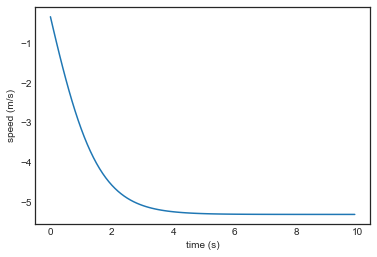

In [ ]:
fig, ax = plt.subplots();

plt.plot(time, velocity)
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)');

We can have much more complex representation of our simulation:

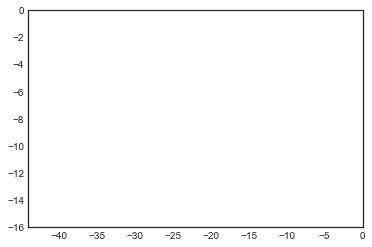

In [ ]:
# First set up the figure, the axis, and the plot elements we want to animate
fig, ax = plt.subplots();

ax.set_xlim((min(position)[0], max(position)[0]))
ax.set_ylim((min(position)[1], max(position)[1]))
line, = ax.plot([], [], lw=4);

In [ ]:
# draw terrain
def terrain(theta_rad, x_0, x_range):
    y_range = theta*(x_range-x_0[0])+x_0[1]-10
    close_triangle = (x_range[0], y_range[-1])
    x_range = np.append(x_range, close_triangle[0])
    y_range = np.append(y_range, close_triangle[1])
    X = np.matrix([x_range, y_range]).transpose()
    patch = plt.Polygon(X, color='yellow')
    return patch

x_range = np.linspace(int(position[0][0]), int(position[-1][0]), num=20)
patch = terrain(theta_rad=theta, x_0=x_0, x_range=x_range)

# initialization function: plot the background of each frame
def init():
    ax.add_patch(patch)
    return patch,

# animation function. This is called sequentially
def animate(i):    
    #line.set_data(time[max(0,i-2):i], position[max(0,i-2):i])
    x_min, x_max = position[max(0,i-2)][0], position[i][0]
    y_min, y_max = position[max(0,i-2)][1], position[i][1]
    line.set_data([x_min, x_max], [y_min, y_max])
    return (line,)


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(time), interval=40, blit=True,
                               repeat_delay=10000, repeat=True);

HTML(anim.to_html5_video())
#anim

----------------------------

## The Control Problem

- We know the model of the system 
- We know how we want the system outputs to behave 
- We can determine the appropriate inputs through various control methods.

_Control problem - how do we generate the appropriate system input that will produce the desired output?_

- Control theory gives you the tools needed to answer this question. 
- Without control theory, the designer is relegated to choosing a control system through trial and error.

- How can I get my system to meet my performance requirements?
- How can I automate a process that currently involves humans in the
loop?
- How can my system operate in a dynamic and noisy environment?

<tr>
<td> <img src="img/11.The-control-problem.png" alt="11.The-control-problem" style="width: 350px;"/> </td>
</tr>

---------------------------

# Why do we need feedback control?

### Open-loop control

- Now the box isn’t just any system, it’s specifically a system that we want to control. 
- We can the system that is being controlled as the process (or controlled system). 
- The inputs into the process are variables that we have access to and can change based on whichever control scheme we choose (manipulated variables).
- Actuators manipulate these variables. An actuator is a generic term that refers to a device or motor that is responsible for controlling a system.
- The actuators are driven by an actuating signal that is generated by the controller.

<tr>
<td> <img src="img/12.feedback-control-1.png" alt="12.feedback-control-1" style="width: 550px;"/> </td>
</tr>


This type of control system is referred to as open-loop since the inputs into the controller are not fed back from the output of the process.

- Open loop control is reserved for simple processes that have well-defined input to output behaviors

Some examples:
- Dishwasher
- Lawn sprinklers


### Feedback-control

For any arbitrary process, an open-loop control system is typically not sufficient. 

This is because:
- there are disturbances that affect your system that are random by nature and beyond your control;
- the process itself might have variations (e.g., variation of resistence due to temperature)

Since an open-loop control has no knowledge of the process output has no way of responding to these variations.


So what can we do about this? 
- We add feedback to our system! 
- We accept the fact that disturbances and process variations are going to influence the controlled variable.
- Instead of living with the resulting error, we add a sensor that will measure the controlled variable and pass it along to our controller. 

<tr>
<td> <img src="img/15.feedback-control-2.png" alt="15.feedback-control-2" style="width: 550px;"/> </td>
</tr>

A feedback control system is able to react to changes to the controlled variable automatically by constantly driving the error term to zero.

### What is a control system?

- A control system is a mechanism that alters the behavior (or the future state) of a system;
- The future behavior of the system must tend towards a state that is desired. 
- This means that you have to know what you want your system to do and then design your control system to generate that desired outcome.

--------------------------------